### Module 4: Final Project Submission

# Predicting Flight Delays with Neural Networks

Noah X. Deutsch (Self-Paced Data Science)


## Project Overview
For this project, I set out to answer the following question:  Can we accurately predict whether or not a flight will be delayed using Neural Networks? I chose this question after stumbling upon a large Kaggle dataset, which proceeded to clean, explore and model with a number of different Neural Network variations. Ultimately, I was able to predict whether a flight would arrive on time with roughly 93% accuracy.


## My Approach
### Obtain √
- From Kaggle

### Scrub √
- Creating our predictor variables
- Dealing with Null Values
- Normalizing our data
- Train test split
- Validation split

### Explore √
- Visualizing some relationships between target and predictor variables

### Model, Compare, and Refine √
- Fit baseline NN model
- Experiment with regularization
- Compare results
- Comparing to other model types

### Interpret √
- Draw conclusions

---
## Obtain

Original dataset:
https://www.kaggle.com/divyansh22/flight-delay-prediction?select=Jan_2020_ontime.csv

In [87]:
#importing our data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = 'Jan_2020_ontime.csv'

df = pd.read_csv(file)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
DAY_OF_MONTH             607346 non-null int64
DAY_OF_WEEK              607346 non-null int64
OP_UNIQUE_CARRIER        607346 non-null object
OP_CARRIER_AIRLINE_ID    607346 non-null int64
OP_CARRIER               607346 non-null object
TAIL_NUM                 606648 non-null object
OP_CARRIER_FL_NUM        607346 non-null int64
ORIGIN_AIRPORT_ID        607346 non-null int64
ORIGIN_AIRPORT_SEQ_ID    607346 non-null int64
ORIGIN                   607346 non-null object
DEST_AIRPORT_ID          607346 non-null int64
DEST_AIRPORT_SEQ_ID      607346 non-null int64
DEST                     607346 non-null object
DEP_TIME                 600682 non-null float64
DEP_DEL15                600647 non-null float64
DEP_TIME_BLK             607346 non-null object
ARR_TIME                 600271 non-null float64
ARR_DEL15                599268 non-null float64
CANCELLED                6073

In [3]:
df.shape

(607346, 22)

In [4]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [88]:
#Our target is heavily skewed – 
#We'll have to keep this in mind when thinking about the accuracy of our models later on

df.ARR_DEL15.value_counts()

0.0    516983
1.0     82285
Name: ARR_DEL15, dtype: int64

In [6]:
#86% of flights are not delayed upon arrival
516983/(516983+82285)

0.8626908161290108

---
## Scrub

In [7]:
#We'll start by dropping all the columns we don't need

df = df.drop(['DAY_OF_MONTH'],axis = 1) #all values are 1...
df = df.drop(['OP_CARRIER_AIRLINE_ID'],axis = 1) #we have 3 different columns with the same data here, so dropping 2
df = df.drop(['OP_CARRIER'],axis = 1) #we have 3 different columns with the same data here, so dropping 2

df = df.drop(['ORIGIN_AIRPORT_SEQ_ID'],axis = 1) #we have 3 different columns with the same data here, so dropping 2
df = df.drop(['ORIGIN'],axis = 1) #we have 3 different columns with the same data here, so dropping 2

df = df.drop(['DEST_AIRPORT_SEQ_ID'],axis = 1) #we have 3 different columns with the same data here, so dropping 2
df = df.drop(['DEST'],axis = 1) #we have 3 different columns with the same data here, so dropping 2

df = df.drop(['DEP_TIME_BLK'],axis = 1) #we'll stick with departure time

df = df.drop(['ARR_TIME'],axis = 1) #we 'cant know this' in advance

df = df.drop(['Unnamed: 21'],axis = 1) #not sure what this is

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 12 columns):
DAY_OF_WEEK          607346 non-null int64
OP_UNIQUE_CARRIER    607346 non-null object
TAIL_NUM             606648 non-null object
OP_CARRIER_FL_NUM    607346 non-null int64
ORIGIN_AIRPORT_ID    607346 non-null int64
DEST_AIRPORT_ID      607346 non-null int64
DEP_TIME             600682 non-null float64
DEP_DEL15            600647 non-null float64
ARR_DEL15            599268 non-null float64
CANCELLED            607346 non-null float64
DIVERTED             607346 non-null float64
DISTANCE             607346 non-null float64
dtypes: float64(6), int64(4), object(2)
memory usage: 55.6+ MB


In [9]:
#removing cancelled data and then the column

print(df.CANCELLED.value_counts())

df = df.loc[df["CANCELLED"]==0]

print(df.CANCELLED.value_counts())

df = df.drop(['CANCELLED'],axis = 1) 

0.0    600418
1.0      6928
Name: CANCELLED, dtype: int64
0.0    600418
Name: CANCELLED, dtype: int64


In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599268 entries, 0 to 607345
Data columns (total 11 columns):
DAY_OF_WEEK          599268 non-null int64
OP_UNIQUE_CARRIER    599268 non-null object
TAIL_NUM             599268 non-null object
OP_CARRIER_FL_NUM    599268 non-null int64
ORIGIN_AIRPORT_ID    599268 non-null int64
DEST_AIRPORT_ID      599268 non-null int64
DEP_TIME             599268 non-null float64
DEP_DEL15            599268 non-null float64
ARR_DEL15            599268 non-null float64
DIVERTED             599268 non-null float64
DISTANCE             599268 non-null float64
dtypes: float64(5), int64(4), object(2)
memory usage: 54.9+ MB


In [12]:
#Fixing some column data types

df['OP_CARRIER_FL_NUM'] = df['OP_CARRIER_FL_NUM'].astype(str)
df['ORIGIN_AIRPORT_ID'] = df['ORIGIN_AIRPORT_ID'].astype(str)
df['DEST_AIRPORT_ID'] = df['DEST_AIRPORT_ID'].astype(str)
df['DISTANCE'] = df['DISTANCE'].astype(int)
df['ARR_DEL15'] = df['ARR_DEL15'].astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599268 entries, 0 to 607345
Data columns (total 11 columns):
DAY_OF_WEEK          599268 non-null int64
OP_UNIQUE_CARRIER    599268 non-null object
TAIL_NUM             599268 non-null object
OP_CARRIER_FL_NUM    599268 non-null object
ORIGIN_AIRPORT_ID    599268 non-null object
DEST_AIRPORT_ID      599268 non-null object
DEP_TIME             599268 non-null float64
DEP_DEL15            599268 non-null float64
ARR_DEL15            599268 non-null int64
DIVERTED             599268 non-null float64
DISTANCE             599268 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 54.9+ MB


In [13]:
#We still have a crazy number of rows. 
#Let's reduce this to a more managable number so my computer can actually run the models...

df = df.sample(n=100000,random_state=0)
df.shape

(100000, 11)

In [14]:
#Let's check for and deal with any NAN values

df.isna().sum()

DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
DEP_TIME             0
DEP_DEL15            0
ARR_DEL15            0
DIVERTED             0
DISTANCE             0
dtype: int64

In [15]:
#Let's sepparate out our X and Y
y = df['ARR_DEL15']
x = df.drop(['ARR_DEL15'],axis = 1)

In [16]:
#Let's grab our dummies for X

x_dummies = pd.get_dummies(x)
print(x.shape)
print(x_dummies.shape)

(100000, 10)
(100000, 12474)


In [17]:
#Next, let's normalize the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_final = scaler.fit_transform(x_dummies)

pd.DataFrame(x_final).describe()

/Users/noahxdeutsch/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,...,12464,12465,12466,12467,12468,12469,12470,12471,12472,12473
count,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.0000
mean,0.490860,0.554752,0.135610,0.0,0.152044,0.038460,0.126290,0.034240,0.041030,0.132580,...,0.002390,0.000040,0.000080,0.00024,0.000680,0.0001,0.001810,0.000090,0.000300,0.0001
std,0.319429,0.207258,0.342376,0.0,0.116797,0.192305,0.332178,0.181846,0.198361,0.339122,...,0.048829,0.006324,0.008944,0.01549,0.026068,0.0100,0.042506,0.009486,0.017318,0.0100
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000
25%,0.166667,0.382243,0.000000,0.0,0.066746,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000
50%,0.500000,0.552730,0.000000,0.0,0.120458,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000
75%,0.666667,0.724885,0.000000,0.0,0.199743,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1.000000,1.000000,1.0000


In [18]:
#Last step – let's make our train test splits.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_final, y, stratify=y,random_state=0)

In [19]:
#And get our Validation data

X_val = X_train[:2000]
X_train_final = X_train[2000:]
y_val = y_train[:2000]
y_train_final = y_train[2000:]

print(len(X_train_final))
print(len(y_train_final))

73000
73000


---
## Explore

In [20]:
#a quick look at our columns
x.columns

Index(['DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DEP_TIME', 'DEP_DEL15',
       'DIVERTED', 'DISTANCE'],
      dtype='object')

In [21]:
#making a new dataframe for EDA purposes

x_eda = x
x_eda['y'] = y*100

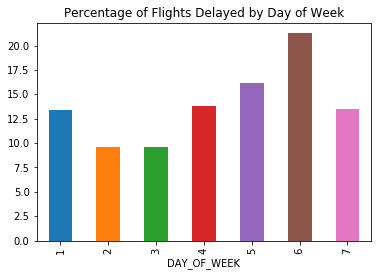

In [69]:
x_eda.groupby('DAY_OF_WEEK').mean().plot(y='y',kind='bar',legend=False,title='Percentage of Flights Delayed by Day of Week')

In [23]:
x_eda.OP_UNIQUE_CARRIER.value_counts()

WN    18017
DL    13258
AA    12629
OO    11619
UA     8230
YX     4700
MQ     4133
B6     4103
OH     3938
9E     3846
AS     3424
YV     2948
NK     2944
F9     1984
EV     1797
G4     1261
HA     1169
Name: OP_UNIQUE_CARRIER, dtype: int64

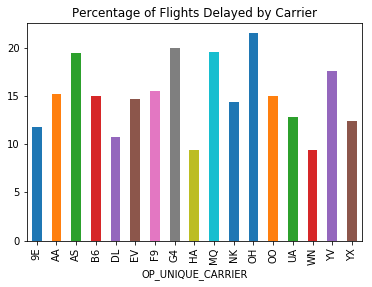

In [70]:
x_eda.groupby('OP_UNIQUE_CARRIER').mean().plot(y='y',kind='bar',legend=False,title='Percentage of Flights Delayed by Carrier')

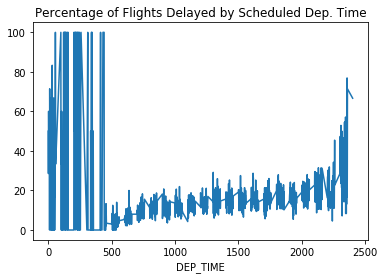

In [71]:
x_eda.groupby('DEP_TIME').mean().plot(y='y',legend=False,title='Percentage of Flights Delayed by Scheduled Dep. Time')

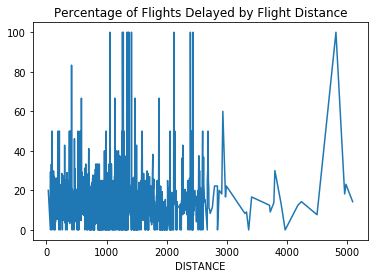

In [72]:
x_eda.groupby('DISTANCE').mean().plot(y='y',legend=False,title='Percentage of Flights Delayed by Flight Distance')

In [ ]:
x_eda.groupby('DEP_DEL15').mean().plot(y='y',kind = 'bar',legend=False,title='Cancellation Percentage by Dep. Time')

In [89]:
#Analysis
    #Theres a clear relationship between DOW and Flight Delays. Weekend flights are most likely to be delayed
    #Certain carriers also have a higher likelihood of having their flights delayed.
    #Flight departing at night(between 9pm - 5am) are increasingly more likely to be delayed.
    #No clear relationship between flight distance and delay.

---
## Modelling

In [27]:
#importing the required modules

import warnings
warnings.filterwarnings('ignore')

import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

Using TensorFlow backend.


#### Basic Neural Network Classifier

In [90]:
#We'll keep it pretty simple for this first one

model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(12474,))) 
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #for Binary Classification

In [35]:
model.compile(optimizer='SGD',
              loss='binary_crossentropy', #for Binary Classification
              metrics=['accuracy'])

In [36]:
history = model.fit(X_train_final,
                    y_train_final,
                    epochs=20, #Sharp diminsishing returns after 10 Epochs
                    batch_size=200,
                    validation_data=(X_val, y_val))

Train on 73000 samples, validate on 2000 samples
Epoch 1/20
73000/73000 [==============================] - 11s 155us/step - loss: 0.4980 - acc: 0.8590 - val_loss: 0.4050 - val_acc: 0.8635
Epoch 2/20
73000/73000 [==============================] - 7s 102us/step - loss: 0.3814 - acc: 0.8635 - val_loss: 0.3583 - val_acc: 0.8635
Epoch 3/20
73000/73000 [==============================] - 8s 108us/step - loss: 0.3276 - acc: 0.8635 - val_loss: 0.3030 - val_acc: 0.8635
Epoch 4/20
73000/73000 [==============================] - 9s 126us/step - loss: 0.2755 - acc: 0.8635 - val_loss: 0.2650 - val_acc: 0.8635
Epoch 5/20
73000/73000 [==============================] - 11s 151us/step - loss: 0.2447 - acc: 0.8969 - val_loss: 0.2456 - val_acc: 0.9230
Epoch 6/20
73000/73000 [==============================] - 9s 120us/step - loss: 0.2291 - acc: 0.9302 - val_loss: 0.2382 - val_acc: 0.9220
Epoch 7/20
73000/73000 [==============================] - 8s 106us/step - loss: 0.2233 - acc: 0.9303 - val_loss: 0.2363 -

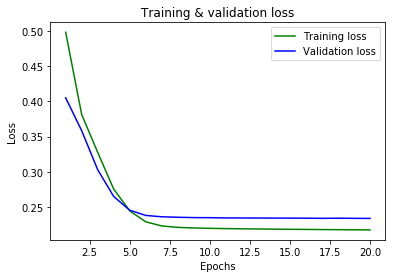

In [37]:
model_val_dict = history.history
model_val_dict.keys()

plt.clf()

import matplotlib.pyplot as plt
loss_values = model_val_dict['loss']
val_loss_values = model_val_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

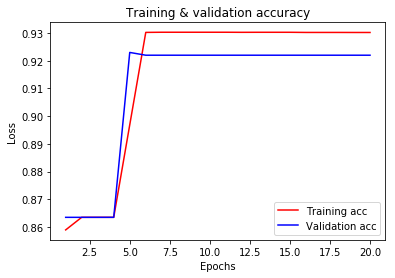

In [38]:
plt.clf()

acc_values = model_val_dict['acc'] 
val_acc_values = model_val_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'blue', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[[20741   847]
 [  853  2559]]


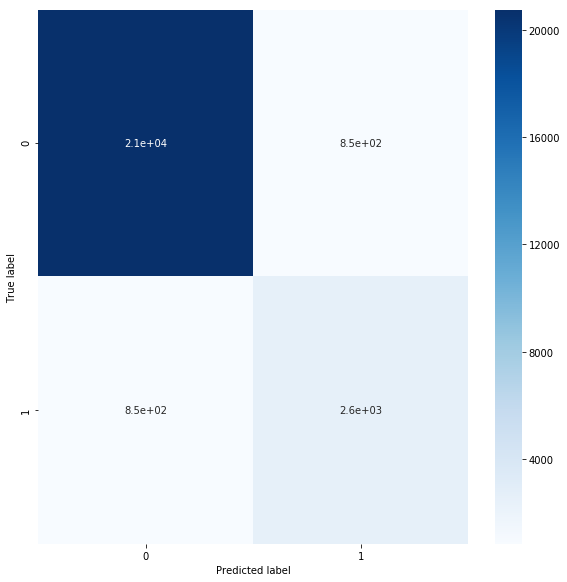

In [40]:
from sklearn.metrics import confusion_matrix

predictions = model.predict_classes(X_test)

cm = confusion_matrix(y_test,predictions)
print(cm)

import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# A great first start! 93% Accuracy on train and 92% on validation. No signs of under/over fitting.

#### Model With L1 Regularization

In [91]:
#let's see if we can improve on this with regularization

model_L1 = models.Sequential()
model_L1.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l1(0.005), input_shape=(12474,))) 
model_L1.add(layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l1(0.005)))
model_L1.add(layers.Dense(1, activation='sigmoid'))

In [92]:
model_L1.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [93]:
history = model_L1.fit(X_train_final,
                    y_train_final,
                    epochs=20,
                    batch_size=200,
                    validation_data=(X_val, y_val))

Train on 73000 samples, validate on 2000 samples
Epoch 1/20
73000/73000 [==============================] - 10s 131us/step - loss: 14.4881 - acc: 0.8635 - val_loss: 1.7353 - val_acc: 0.8635
Epoch 2/20
73000/73000 [==============================] - 7s 96us/step - loss: 0.8198 - acc: 0.8635 - val_loss: 0.7226 - val_acc: 0.8635
Epoch 3/20
73000/73000 [==============================] - 7s 96us/step - loss: 0.6864 - acc: 0.8635 - val_loss: 0.6635 - val_acc: 0.8635
Epoch 4/20
73000/73000 [==============================] - 8s 104us/step - loss: 0.6311 - acc: 0.8635 - val_loss: 0.6174 - val_acc: 0.8635
Epoch 5/20
73000/73000 [==============================] - 8s 106us/step - loss: 0.5894 - acc: 0.8805 - val_loss: 0.5811 - val_acc: 0.9220
Epoch 6/20
73000/73000 [==============================] - 8s 110us/step - loss: 0.5543 - acc: 0.9303 - val_loss: 0.5486 - val_acc: 0.9220
Epoch 7/20
73000/73000 [==============================] - 8s 114us/step - loss: 0.5226 - acc: 0.9303 - val_loss: 0.5188 - v

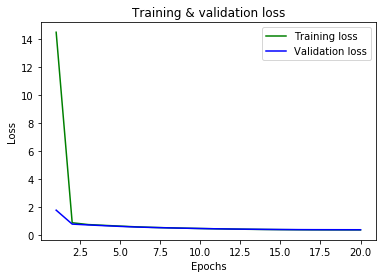

In [56]:
model_val_dict = history.history
model_val_dict.keys()

plt.clf()

import matplotlib.pyplot as plt
loss_values = model_val_dict['loss']
val_loss_values = model_val_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

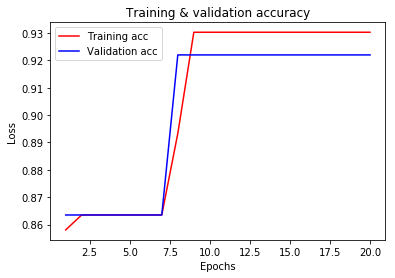

In [57]:
plt.clf()

acc_values = model_val_dict['acc'] 
val_acc_values = model_val_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'blue', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[[20740   848]
 [  849  2563]]


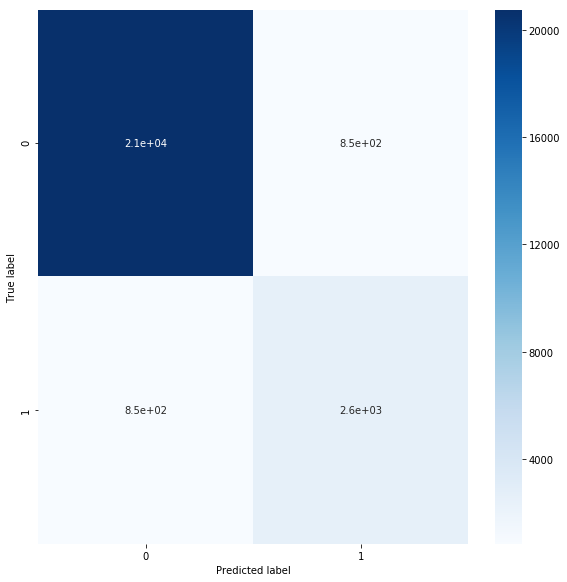

In [58]:
from sklearn.metrics import confusion_matrix

predictions = model.predict_classes(X_test)

cm = confusion_matrix(y_test,predictions)
print(cm)

import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [94]:
#A nearly identical result. Let's see is L2 is better!

#### Neural Network with L2 Regularization

In [59]:
model_L2 = models.Sequential()
model_L2.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(12474,))) 
model_L2.add(layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.005)))
model_L2.add(layers.Dense(1, activation='sigmoid'))

In [60]:
model_L2.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
history = model_L2.fit(X_train_final,
                    y_train_final,
                    epochs=20,
                    batch_size=200,
                    validation_data=(X_val, y_val))

Train on 73000 samples, validate on 2000 samples
Epoch 1/20
73000/73000 [==============================] - 10s 138us/step - loss: 1.0393 - acc: 0.8601 - val_loss: 0.9317 - val_acc: 0.8635
Epoch 2/20
73000/73000 [==============================] - 10s 133us/step - loss: 0.8895 - acc: 0.8635 - val_loss: 0.8484 - val_acc: 0.8635
Epoch 3/20
73000/73000 [==============================] - 9s 125us/step - loss: 0.7980 - acc: 0.8635 - val_loss: 0.7597 - val_acc: 0.8635
Epoch 4/20
73000/73000 [==============================] - 10s 131us/step - loss: 0.7190 - acc: 0.8745 - val_loss: 0.6978 - val_acc: 0.9200
Epoch 5/20
73000/73000 [==============================] - 10s 137us/step - loss: 0.6663 - acc: 0.9273 - val_loss: 0.6579 - val_acc: 0.9220
Epoch 6/20
73000/73000 [==============================] - 11s 156us/step - loss: 0.6297 - acc: 0.9303 - val_loss: 0.6268 - val_acc: 0.9220
Epoch 7/20
73000/73000 [==============================] - 10s 135us/step - loss: 0.5998 - acc: 0.9303 - val_loss: 0.59

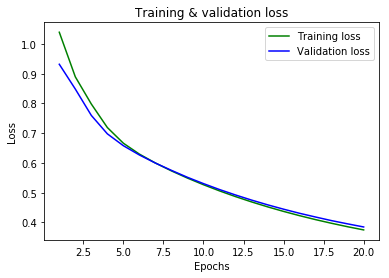

In [62]:
model_val_dict = history.history
model_val_dict.keys()

plt.clf()

import matplotlib.pyplot as plt
loss_values = model_val_dict['loss']
val_loss_values = model_val_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

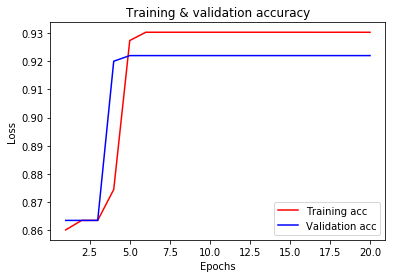

In [63]:
plt.clf()

acc_values = model_val_dict['acc'] 
val_acc_values = model_val_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'blue', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[[20740   848]
 [  849  2563]]


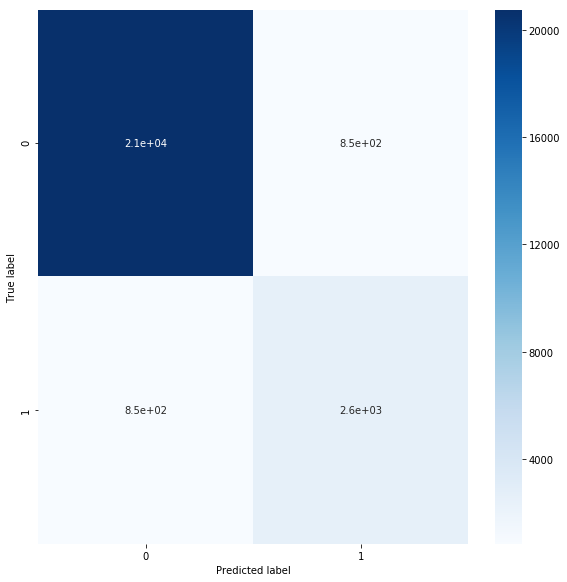

In [64]:
from sklearn.metrics import confusion_matrix

predictions = model.predict_classes(X_test)

cm = confusion_matrix(y_test,predictions)
print(cm)

import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#Still no improvement. Oh Well! Let's compare it to something different...

#### Comparison to a Boosted Ensemble Classifier

In [66]:
#I thoguht it would be interesting to compare the performance of the neural network to a boosted ensemble method 

from sklearn.ensemble import AdaBoostClassifier

dt_clf = AdaBoostClassifier()
dt_clf.fit(X_train, y_train)
training_preds = dt_clf.predict(X_train)
val_preds = dt_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 93.0%
Validation accuracy: 93.14%


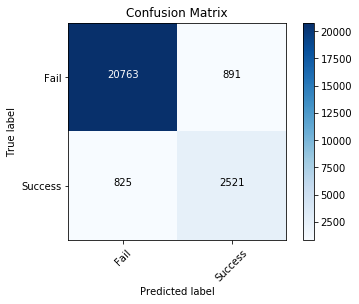

In [67]:
#Confusion Matrix for AdaBoost

cnf_matrix = confusion_matrix(val_preds, y_test)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = ['Fail','Success'] #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

plt.colorbar()

In [ ]:
#Here we get a very similar result as well! 
#Our NN performed ever so slightly better, but my guess is this might match it if we optimized it with GridSearch.

---
## Interpret

In [65]:
results_basic = model.evaluate(X_test, y_test)
results_L1 = model_L1.evaluate(X_test, y_test)
results_L2 = model_L2.evaluate(X_test, y_test)

print('Basic NN: ',"test loss, test acc: ", results_basic)
print('L1 NN: ',"test loss, test acc: ", results_L1)
print('L2 NN: ',"test loss, test acc: ", results_L2)

25000/25000 [==============================] - 3s 123us/step
Basic NN:  test loss, test acc:  [0.36696315479278563, 0.93212]
L1 NN:  test loss, test acc:  [0.34169606274604797, 0.93212]
L2 NN:  test loss, test acc:  [0.3669605122852325, 0.93212]


Text(0.5, 1.0, 'Flight Delay Model Test Accuracy')

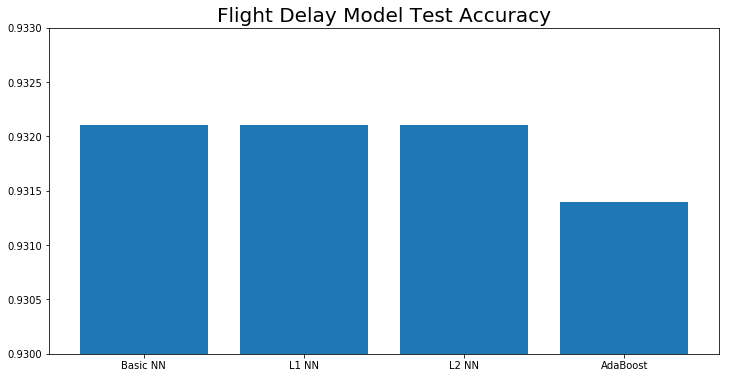

In [80]:
model_name = ['Basic NN','L1 NN','L2 NN','AdaBoost']
model_acc = [.9321,.9321,.9321,.9314]

import matplotlib.pyplot as plt


fig, ax  = plt.subplots(figsize = (12,6))
ax.set_ylim([.93, .933],auto=False)    
ax.bar(model_name,model_acc)
plt.title('Flight Delay Model Test Accuracy',fontsize = 20)

## Ultimately, our Neural Network was able to predict Arrival Delays with ~93% accuracy. 

It does not appear as though the model would benefit from additional training time, as the accuracy seems to stall after only a few epochs.

The network performed slightly better than, but similar to, the boosted ensemble model.